# **Kaggle Competition - CMI - Problematic Internet Use**

# Model Prediction and Analysis Approach

## Overview
In this approach, predictions from different models were obtained and manually analyzed for similarity. The final predictions were then derived using a **majority voting technique** to ensure robustness and accuracy in the submission file.

## Methodology

### 1. Models Used
- Various **tree-based classifiers and regressors** were employed to generate predictions. These models were chosen for their proven performance and ability to handle complex datasets effectively.
- An **Artificial Neural Network (ANN)** model was also attempted. However, the results from the ANN model were significantly subpar compared to the tree-based methods.

### 2. Manual Analysis
- The predictions from all models were closely examined to identify similarities and discrepancies. This step ensured that the models were performing as expected and allowed for the identification of outliers or anomalies in individual model outputs.

### 3. Majority Voting
- A **majority voting approach** was implemented to finalize the predictions. By aggregating predictions from all models, this technique helped in achieving a more reliable and consensus-based outcome for the submission file.

## Results
- The tree-based models consistently provided better predictions, highlighting their suitability for the dataset and task.
- The ANN model's performance was not up to the mark, which could be attributed to factors such as insufficient hyperparameter tuning, inappropriate architecture, or the nature of the dataset.

## Conclusion
The combination of tree-based models and the majority voting mechanism proved to be effective in generating accurate predictions for the final submission file. Future iterations may explore improved ANN architectures or hybrid methods to further enhance performance.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew
from scipy.fft import fft
from scipy.signal import find_peaks
from scipy.stats import entropy
import pywt

In [1]:
def new_features(features, id_value):
    # Create an empty DataFrame to store features

    # Add the ID to the features DataFrame
    features['id'] = [id_value]  # Add the extracted id as a column

    # Aggregating basic statistics for X, Y, and Z
    features['skew_x'] = skew(features['X'])
    features['kurtosis_x'] = kurtosis(features['X'])
    features['skew_y'] = skew(features['Y'])
    features['kurtosis_y'] = kurtosis(features['Y'])
    features['skew_z'] = skew(features['Z'])
    features['kurtosis_z'] = kurtosis(features['Z'])
    
    # Add non-wear and wear group features if 'non_wear_flag' exists
    if 'non_wear_flag' in features.columns:
        non_wear_group = features[features['non_wear_flag'] == 1]
        wear_group = features[features['non_wear_flag'] == 0]
        features['non_wear_mean_x'] = non_wear_group['X'].mean() if not non_wear_group.empty else np.nan
        features['wear_mean_x'] = wear_group['X'].mean() if not wear_group.empty else np.nan

    # Hour and part of day features (if 'relative_date_PCIAT' exists)
    if 'relative_date_PCIAT' in features.columns:
        features['hour'] = pd.to_datetime(features['relative_date_PCIAT']).dt.hour
        features['part_of_day'] = pd.cut(features['hour'], bins=[0, 6, 12, 18, 24], labels=['night', 'morning', 'afternoon', 'evening'])
        features['mean_hour'] = features['hour'].mean()
        features['part_of_day'] = features['part_of_day'].mode()[0]

    return features

In [2]:
import os
import pandas as pd
train_data = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/train.csv")
# Define base path to the dataset
base_path = "/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/"

# Initialize an empty DataFrame to store all features
train = pd.DataFrame()

# Function to process and generate features
def new_features(df, id_value):
    # Assuming the function is already defined as per the previous explanation
    features = pd.DataFrame()
    # Feature extraction code here (from your new_features function)
    return features

# Loop over all directories in the base path
for id_dir in os.listdir(base_path):
    id_path = os.path.join(base_path, id_dir)
    
    # Ensure we are processing directories (i.e., IDs)
    if os.path.isdir(id_path):
        parquet_file = os.path.join(id_path, "part-0.parquet")
        
        # Check if the parquet file exists before trying to load it
        if os.path.exists(parquet_file):
            # Load the parquet file
            df = pd.read_parquet(parquet_file)
            
            # Extract the ID from the directory name
            id_value = id_dir.split('=')[-1]  # Extracts '00115b9f' from 'id=00115b9f' 
            
            # Drop the 'step' column if it exists
            if 'step' in df.columns:
                df.drop('step', axis=1, inplace=True)
            
            # Apply feature creation (assuming new_features is defined)
            new_features(df, id_value)  # Generate features for the current ID
            
            feature = df.describe().values.reshape(1, -1)
                    # Convert the feature array into a DataFrame
            feature_df = pd.DataFrame(feature, columns=[f'feature_{i}' for i in range(feature.shape[1])])

            # Add the 'id' for this specific record
            feature_df['id'] = id_dir.split('=')[-1]  # Extract ID from folder name

            # Merge with the main train_data DataFrame on 'id'
            train = pd.concat([train, feature_df], ignore_index=True)
        
        else:
            print(f"Parquet file not found for ID: {id_dir}. Skipping.")
    
# Output the final combined DataFrame
print(train)
train_data = pd.merge(train_data,train, on='id', how='left')

     feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0      50458.0    50458.0    50458.0    50458.0    50458.0    50458.0   
1     340584.0   340584.0   340584.0   340584.0   340584.0   340584.0   
2      40003.0    40003.0    40003.0    40003.0    40003.0    40003.0   
3     223915.0   223915.0   223915.0   223915.0   223915.0   223915.0   
4      15420.0    15420.0    15420.0    15420.0    15420.0    15420.0   
..         ...        ...        ...        ...        ...        ...   
991   394128.0   394128.0   394128.0   394128.0   394128.0   394128.0   
992     1195.0     1195.0     1195.0     1195.0     1195.0     1195.0   
993   393240.0   393240.0   393240.0   393240.0   393240.0   393240.0   
994    40085.0    40085.0    40085.0    40085.0    40085.0    40085.0   
995   342324.0   342324.0   342324.0   342324.0   342324.0   342324.0   

     feature_6  feature_7  feature_8  feature_9  ...  feature_87  feature_88  \
0      50458.0    50458.0    50458.0    504

In [3]:
import os
import pandas as pd

# Define base path to the dataset
base_path = "/kaggle/input/child-mind-institute-problematic-internet-use/series_test.parquet/"

# Initialize an empty DataFrame to store all features
test = pd.DataFrame()

# Function to process and generate features
def new_features(df, id_value):
    # Assuming the function is already defined as per the previous explanation
    features = pd.DataFrame()
    # Feature extraction code here (from your new_features function)
    return features

# Loop over all directories in the base path
for id_dir in os.listdir(base_path):
    id_path = os.path.join(base_path, id_dir)
    
    # Ensure we are processing directories (i.e., IDs)
    if os.path.isdir(id_path):
        parquet_file = os.path.join(id_path, "part-0.parquet")
        
        # Check if the parquet file exists before trying to load it
        if os.path.exists(parquet_file):
            # Load the parquet file
            df = pd.read_parquet(parquet_file)
            
            # Extract the ID from the directory name
            id_value = id_dir.split('=')[-1]  # Extracts '00115b9f' from 'id=00115b9f' 
            
            # Drop the 'step' column if it exists
            if 'step' in df.columns:
                df.drop('step', axis=1, inplace=True)
            
            # Apply feature creation (assuming new_features is defined)
            new_features(df, id_value)  # Generate features for the current ID
            
            feature = df.describe().values.reshape(1, -1)
                    # Convert the feature array into a DataFrame
            feature_df = pd.DataFrame(feature, columns=[f'feature_{i}' for i in range(feature.shape[1])])

            # Add the 'id' for this specific record
            feature_df['id'] = id_dir.split('=')[-1]  # Extract ID from folder name

            # Merge with the main train_data DataFrame on 'id'
            test = pd.concat([test, feature_df], ignore_index=True)
        
        else:
            print(f"Parquet file not found for ID: {id_dir}. Skipping.")
    
# Output the final combined DataFrame
print(test)


   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0    43330.0    43330.0    43330.0    43330.0    43330.0    43330.0   
1   396396.0   396396.0   396396.0   396396.0   396396.0   396396.0   

   feature_6  feature_7  feature_8  feature_9  ...  feature_87  feature_88  \
0    43330.0    43330.0    43330.0    43330.0  ...    4.004276   89.751656   
1   396396.0   396396.0   396396.0   396396.0  ...    2.952888   89.476036   

   feature_89   feature_90  feature_91    feature_92  feature_93  feature_94  \
0         0.0  2633.250000      4188.5  8.611000e+13         7.0         3.0   
1         1.0  2597.800049      4175.0  8.639500e+13         7.0         3.0   

   feature_95        id  
0        85.0  00115b9f  
1        91.0  001f3379  

[2 rows x 97 columns]


In [4]:
test_data = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/test.csv")
test_data = pd.merge(test_data,test, on='id', how='left')

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.impute import SimpleImputer

# Load the datasets
test = test_data
train = train_data
# train = train[~train['sii'].isin([2, 3])]
train = train.dropna(subset=['sii'])
# Preprocess the data
train_data = train.drop(['id', 'Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season',
       'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season',
       'PAQ_C-Season','SDS-Season', 'PreInt_EduHx-Season', 'sii','PCIAT-Season', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02',
       'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06',
       'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10',
       'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14',
       'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18',
       'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'PCIAT-PCIAT_Total'], axis=1)

# Identifying categorical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

# Apply One-Hot Encoding to categorical columns
train_data = pd.get_dummies(train_data, columns=categorical_columns)
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# train_data = pd.DataFrame(imputer.fit_transform(train_data), columns=train_data.columns)
imputer = SimpleImputer(strategy='median')  # 'median' or 'most_frequent' are also options
train_data = imputer.fit_transform(train_data)

# Prepare the target variable
train_labels = train["sii"]  # Target variable (labels)
train_data = train_data # Drop target column from features

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.001, random_state=42)

# Build the model architecture
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(256, activation='relu'),# Shape based on number of features
    layers.Dense(64, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(4,activation = 'softmax')  # Output layer with 4 units (for classification of 4 classes)
])

from tensorflow.keras import optimizers
optimizer = optimizers.Adam(learning_rate=0.001)
# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


# Model summary
model.summary()

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * 0.9 ** epoch)
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))


# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Preprocess the test data in the same way as the training data
test_data = test.drop(['id'], axis=1)
categorical_columns = test_data.select_dtypes(include=['object']).columns
test_data = test_data.drop(columns=categorical_columns,axis = 1)  

imputer = SimpleImputer(strategy='mean')  # 'median' or 'most_frequent' are also options
test_data = imputer.fit_transform(test_data)
# from sklearn.experimental import enable_iterative_imputer  # Enable the IterativeImputer class
# from sklearn.impute import IterativeImputer
# from sklearn.ensemble import RandomForestRegressor

# # Create the imputer with a random forest regressor model
# rf_imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=42)
# test_data = rf_imputer.fit_transform(test_data)

predictions = model.predict(test_data)

# Print the first 5 predictions
print("Predictions (First 5 rows):", predictions[:5])


Categorical columns: Index([], dtype='object')


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        74,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 223,124 (871.58 KB)

 Trainable params: 223,124 (871.58 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


I0000 00:00:1734522565.841428     120 service.cc:145] XLA service 0x7a7c8000ae90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734522565.841499     120 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734522565.841503     120 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


68/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4294 - loss: 889082609664.0000 

I0000 00:00:1734522567.772380     120 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.4307 - loss: 830215880704.0000 - val_accuracy: 0.6667 - val_loss: 88895217664.0000
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4484 - loss: 311091068928.0000 - val_accuracy: 0.6667 - val_loss: 24667576320.0000
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4476 - loss: 172344983552.0000 - val_accuracy: 0.6667 - val_loss: 43947872256.0000
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4476 - loss: 177632182272.0000 - val_accuracy: 0.3333 - val_loss: 338490392576.0000
Epoch 5/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3931 - loss: 211854147584.0000 - val_accuracy: 0.3333 - val_loss: 16321609728.0000
Epoch 6/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4442 - loss: 91046584320.0000 - val_accuracy: 0.3333 - val_loss: 51092238336.0000
Epoch 7/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3954 - loss: 62190100480.0000 - val_accuracy: 0.3333 - val

In [6]:
class_labels = np.argmax(predictions, axis=1)

print("Class Labels:", class_labels)

Class Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [7]:
sample = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/sample_submission.csv")
Submission = pd.DataFrame({
    'id': sample['id'],
    'sii': class_labels
})

# Submission.to_csv('submission.csv', index=False)

In [8]:
# Import necessary libraries
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset (using Iris dataset for example)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.0001, random_state=42)

# Initialize the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Optionally, you can check the feature importance
print("Feature importance:")
print(model.feature_importances_)
predictions = model.predict(test_data)
predictions

Accuracy: 100.00%
Feature importance:
[0.02290856 0.00940517 0.00600743 0.00666684 0.00911481 0.00782451
 0.0072487  0.00649894 0.00689346 0.00683756 0.01126421 0.00681077
 0.01088186 0.0096885  0.00580826 0.00666418 0.00577782 0.00613398
 0.0054916  0.00820951 0.00425796 0.00680609 0.00550396 0.00608769
 0.00744384 0.0068714  0.00691169 0.00432604 0.00818346 0.00823408
 0.00695393 0.00685017 0.0072268  0.         0.00815413 0.00690877
 0.00614494 0.00541676 0.00671308 0.0088316  0.00594828 0.00742906
 0.00640262 0.00639392 0.00595321 0.00992437 0.01165116 0.01473898
 0.00778474 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00999866 0.0098254  0.00933659 0.00836576 0.01162102 0.00581958
 0.01224902 0.00933603 0.00999972 0.00731323 0.00656806 0.01011966
 0.00628886 0.00803117 0.00730873 0.00503314 0.01177181 0.00662141
 0.01158823 0.00647372 0.01367135 0.00585179 0.00897692 0.00644392
 0.0099979  0.00658468 0.00767648 0.    

array([2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0])

In [9]:
sample = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/sample_submission.csv")
Submission1 = pd.DataFrame({
    'id': sample['id'],
    'sii': predictions
})

In [10]:
Submission1

,id,sii
0,00008ff9,2
1,000fd460,0
2,00105258,0
3,00115b9f,1
4,0016bb22,0
5,001f3379,1
6,0038ba98,0
7,0068a485,0
8,0069fbed,0
9,0083e397,0


In [11]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.001, random_state=42)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Optionally, you can check the feature importance
print("Feature importance:")
print(model.feature_importances_)


Accuracy: 66.67%
Feature importance:
[3.67362385e-02 7.40081623e-03 2.77938751e-02 2.66904360e-02
 3.76337755e-02 3.27309093e-02 6.40166079e-03 2.14713845e-02
 2.62814329e-02 2.39126568e-02 3.86798332e-03 4.97814032e-03
 8.74415509e-03 1.96484189e-02 3.19565889e-03 1.25725611e-02
 3.21156904e-03 1.22079855e-02 2.98440693e-03 1.35347237e-02
 2.70332423e-03 1.48745292e-02 2.79621705e-03 1.65723723e-02
 2.64457213e-03 1.33297980e-02 2.82721231e-03 5.18405258e-03
 1.59347526e-02 1.29752075e-02 1.44377299e-02 1.52860935e-02
 1.42370744e-02 1.58419784e-02 1.48486646e-02 1.47791897e-02
 1.39198496e-02 3.45733026e-03 1.52644714e-02 1.80277296e-02
 1.55292208e-02 1.55945565e-02 1.41041879e-02 9.48776831e-03
 2.83541514e-02 4.12571040e-02 3.81358824e-02 3.16607053e-02
 2.01431440e-03 2.07803377e-03 2.29848122e-03 2.46918969e-03
 1.94905062e-03 2.29662452e-03 1.90673333e-03 2.05474133e-03
 2.04578464e-03 1.94677758e-03 1.77272498e-03 2.07531577e-03
 3.82151871e-03 3.47770946e-03 3.10460743e-03 3.

In [12]:
sample = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/sample_submission.csv")
Submission2 = pd.DataFrame({
    'id': sample['id'],
    'sii': predictions
})


In [13]:
Submission2

,id,sii
0,00008ff9,2
1,000fd460,0
2,00105258,0
3,00115b9f,1
4,0016bb22,0
5,001f3379,1
6,0038ba98,0
7,0068a485,0
8,0069fbed,0
9,0083e397,0


In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.001, random_state=42)

# Initialize the Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

sample = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/sample_submission.csv")
Submission8 = pd.DataFrame({
    'id': sample['id'],
    'sii': predictions
})


Accuracy: 66.67%


In [15]:
sample = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/sample_submission.csv")
Submission8 = pd.DataFrame({
    'id': sample['id'],
    'sii': predictions
})
Submission8

,id,sii
0,00008ff9,2
1,000fd460,0
2,00105258,0
3,00115b9f,1
4,0016bb22,0
5,001f3379,1
6,0038ba98,0
7,0068a485,0
8,0069fbed,0
9,0083e397,0


In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.001, random_state=42)

# Initialize the AdaBoost model
model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

sample = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/sample_submission.csv")
Submission9 = pd.DataFrame({
    'id': sample['id'],
    'sii': predictions
})


Accuracy: 66.67%


In [17]:
Submission9

,id,sii
0,00008ff9,2
1,000fd460,0
2,00105258,0
3,00115b9f,1
4,0016bb22,0
5,001f3379,1
6,0038ba98,0
7,0068a485,0
8,0069fbed,0
9,0083e397,0


In [18]:
import lightgbm as lgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.001, random_state=42)

# Initialize LightGBM model
model = lgb.LGBMClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

sample = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/sample_submission.csv")
Submission13 = pd.DataFrame({
    'id': sample['id'],
    'sii': predictions
})


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002520 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24184
[LightGBM] [Info] Number of data points in the train set: 2733, number of used features: 140
[LightGBM] [Info] Start training from score -0.540409
[LightGBM] [Info] Start training from score -1.321481
[LightGBM] [Info] Start training from score -1.978261
[LightGBM] [Info] Start training from score -4.386795
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 66.67%


In [19]:
Submission13

,id,sii
0,00008ff9,2
1,000fd460,0
2,00105258,0
3,00115b9f,1
4,0016bb22,0
5,001f3379,1
6,0038ba98,0
7,0068a485,0
8,0069fbed,0
9,0083e397,0


In [20]:
from catboost import CatBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.001, random_state=42)

# Initialize CatBoost model
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, verbose=0)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

sample = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/sample_submission.csv")
Submission14 = pd.DataFrame({
    'id': sample['id'],
    'sii': predictions
})


Accuracy: 33.33%


In [21]:
Submission14

,id,sii
0,00008ff9,2
1,000fd460,0
2,00105258,0
3,00115b9f,1
4,0016bb22,0
5,001f3379,1
6,0038ba98,0
7,0068a485,0
8,0069fbed,0
9,0083e397,0


In [22]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
import catboost as cb
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.001, random_state=42)
# Define base learners (estimators)
base_learners = [
    ('xgb', XGBClassifier()),
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('catboost', cb.CatBoostClassifier(learning_rate=0.1, iterations=100, depth=3, verbose=0)),
    ('ada', AdaBoostClassifier(n_estimators=100)),
    ('lgb', lgb.LGBMClassifier()),
    ('gbm', GradientBoostingClassifier())
]

# Define meta-model (Logistic Regression)
meta_model = LogisticRegression()

# Define StackingClassifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict on test set
y_pred = stacking_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy * 100:.2f}%")
Submission16 = pd.DataFrame({
    'id': sample['id'],
    'sii': predictions
})


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24184
[LightGBM] [Info] Number of data points in the train set: 2733, number of used features: 140
[LightGBM] [Info] Start training from score -0.540409
[LightGBM] [Info] Start training from score -1.321481
[LightGBM] [Info] Start training from score -1.978261
[LightGBM] [Info] Start training from score -4.386795
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001976 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23698
[LightGBM] [Info] Number of data points in the train set: 2186, number of used features: 139
[LightGBM] [Info] Start training from score -0.540697
[LightGBM] [Info] Start training from score -1.321641
[LightGBM] [Info] Sta

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
Submission16

,id,sii
0,00008ff9,2
1,000fd460,0
2,00105258,0
3,00115b9f,1
4,0016bb22,0
5,001f3379,1
6,0038ba98,0
7,0068a485,0
8,0069fbed,0
9,0083e397,0


In [24]:
from sklearn.datasets import make_classification
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Convert the dense feature matrix to a sparse format
train_dat = csr_matrix(train_data)
train_labels = train_labels
import lightgbm as lgb

# Train LightGBM with sparse data
lgb_model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_model.fit(train_dat, train_labels)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
# Predict and evaluate
y_pred_lgb = lgb_model.predict(test_data)
y_pred_lgb
sample = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/sample_submission.csv")
Submission15 = pd.DataFrame({
    'id': sample['id'],
    'sii': y_pred_lgb
})

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24184
[LightGBM] [Info] Number of data points in the train set: 2736, number of used features: 140
[LightGBM] [Info] Start training from score -0.540250
[LightGBM] [Info] Start training from score -1.321208
[LightGBM] [Info] Start training from score -1.979358
[LightGBM] [Info] Start training from score -4.387892
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 33.33%


In [25]:
Submission15

,id,sii
0,00008ff9,2.0
1,000fd460,0.0
2,00105258,0.0
3,00115b9f,1.0
4,0016bb22,0.0
5,001f3379,1.0
6,0038ba98,0.0
7,0068a485,0.0
8,0069fbed,0.0
9,0083e397,0.0


# **Final Submission - 1**

In [26]:
import pandas as pd

# Sort and reset index for all submissions
submissions = [Submission1, Submission2,
                Submission8, Submission9,
                 Submission13, Submission14, Submission15,Submission]

for i in range(len(submissions)):
    submissions[i] = submissions[i].sort_values(by='id').reset_index(drop=True)

# Combine all submissions into a single DataFrame
combined = pd.DataFrame({
    'id': submissions[0]['id'],  # Assume all submissions have the same 'id' column
    'sii_1': submissions[0]['sii'],
    # 'sii_2': submissions[1]['sii'],
    'sii_8': submissions[2]['sii'],
    # 'sii_9': submissions[8]['sii'],
    'sii_13': submissions[4]['sii'],
    # 'sii_14': submissions[13]['sii'],
    'sii_15': submissions[6]['sii'],
    'sii_16': submissions[7]['sii']
    
})

# Function to calculate majority vote
def majority_vote(row):
    # Use mode to find the most common value
    return row.mode()[0]  # Assuming no ties in the mode

# Apply majority vote across all columns for 'sii' values
combined['final_sii'] = combined[
    ['sii_1', 
     # 'sii_2', 'sii_3', 'sii_4',
     # 'sii_5', 'sii_6', 'sii_7', 
     'sii_8', 
     # 'sii_9', 
     # 'sii_10', 'sii_11', 'sii_12', 
     'sii_13', 
     # 'sii_14', 
     'sii_15','sii_16'
    ]
].apply(majority_vote, axis=1)

# Prepare the final submission
sum_submission = combined[['id', 'final_sii']].rename(columns={'final_sii': 'sii'})
# sum_submission.to_csv('submission.csv', index=False)

# Display the final submission
sum_submission


,id,sii
0,00008ff9,2.0
1,000fd460,0.0
2,00105258,0.0
3,00115b9f,1.0
4,0016bb22,0.0
5,001f3379,1.0
6,0038ba98,0.0
7,0068a485,0.0
8,0069fbed,0.0
9,0083e397,0.0


Training model to predict columns that are present in training data but not in test data.
This model is saved and used to predict and merge those columns in test data which is later used to pass to models.

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer

# Load your dataset
df = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')
# df = df[~df['sii'].isin([2, 3])]

# Drop rows with missing values in 'sii'
# df = df.dropna(subset=['sii'])

# Target columns to predict
target_columns = [
    'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 
    'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 
    'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 
    'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 
    'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 
    # 'PCIAT-PCIAT_Total'
]

# Features (X): Drop target columns and irrelevant columns
irrelevant_columns = [
    'id', 'Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season',
    'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season',
    'PCIAT-PCIAT_Total',
    'PAQ_C-Season', 'SDS-Season', 'PreInt_EduHx-Season', 'sii', 'PCIAT-Season'
]
X = df.drop(columns=target_columns + irrelevant_columns)

# Convert all columns to numeric and handle invalid values
X = X.apply(pd.to_numeric, errors='coerce')

# Initialize the KNN Imputer
knn_imputer = KNNImputer(n_neighbors=10)

# Impute missing values and convert back to DataFrame
X_imputed = pd.DataFrame(knn_imputer.fit_transform(X), columns=X.columns)

# Create a DataFrame to store predictions
predictions_df = pd.DataFrame()

# Loop through each target column for prediction
for target in target_columns:
    print(f"Training model for target: {target}")
    
    # Define target variable
    y = df[target]
    
    # Drop rows with missing values in target column
    df_combined = pd.concat([X_imputed, y], axis=1)
    df_combined = df_combined.dropna(subset=[target])
    
    # Ensure `y` is numeric after dropping NaNs
    y = pd.to_numeric(df_combined[target], errors='coerce')
    
    # Align X and y after dropping NaNs
    X_valid = df_combined.drop(columns=[target])
    y_valid = df_combined[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_valid, y_valid, test_size=0.2, random_state=42)
    
    # Initialize the XGBoost regressor
    model = XGBRegressor(random_state=42)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Add predictions to the DataFrame
    predictions_df[target] = pd.Series(y_pred, index=y_test.index)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error for {target}: {mse}")
    model.save_model(f'{target}_model.json')



Training model for target: PCIAT-PCIAT_01
Mean Squared Error for PCIAT-PCIAT_01: 2.9303740801196936
Training model for target: PCIAT-PCIAT_02
Mean Squared Error for PCIAT-PCIAT_02: 2.893540273976209
Training model for target: PCIAT-PCIAT_03
Mean Squared Error for PCIAT-PCIAT_03: 2.4028783466526082
Training model for target: PCIAT-PCIAT_04
Mean Squared Error for PCIAT-PCIAT_04: 1.4681503517924086
Training model for target: PCIAT-PCIAT_05
Mean Squared Error for PCIAT-PCIAT_05: 2.9249154362972787
Training model for target: PCIAT-PCIAT_06
Mean Squared Error for PCIAT-PCIAT_06: 1.4080781591128404
Training model for target: PCIAT-PCIAT_07
Mean Squared Error for PCIAT-PCIAT_07: 0.9229951437683196
Training model for target: PCIAT-PCIAT_08
Mean Squared Error for PCIAT-PCIAT_08: 1.8343147768126324
Training model for target: PCIAT-PCIAT_09
Mean Squared Error for PCIAT-PCIAT_09: 1.3998754857186164
Training model for target: PCIAT-PCIAT_10
Mean Squared Error for PCIAT-PCIAT_10: 1.9512605736971755
T

In [28]:
import pandas as pd
import xgboost as xgb
from sklearn.impute import KNNImputer

# Load the test data
test_data = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/test.csv")

# Drop irrelevant columns
irrelevant_columns = [
    'id', 'Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season',
    'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season',
    # 'PCIAT-PCIAT_Total',
    'PAQ_C-Season', 'SDS-Season', 'PreInt_EduHx-Season',
]
test_data = test_data.drop(columns=irrelevant_columns)

# Convert all columns to numeric and handle invalid values
test_data = test_data.apply(pd.to_numeric, errors='coerce')

# Initialize the KNN Imputer and impute missing values
knn_imputer = KNNImputer(n_neighbors=10)
test_data = pd.DataFrame(knn_imputer.fit_transform(test_data), columns=test_data.columns)

# Initialize the DataFrame to store predictions
predictions_df = pd.DataFrame()

# Loop through each target column for prediction
for target in target_columns:
    # Step 1: Load the saved XGBoost model
    model = xgb.XGBRegressor()
    model.load_model(f'{target}_model.json')
    
    # Step 2: Make predictions on the test data
    predictions = model.predict(test_data)
    
    # Step 3: Store predictions in the DataFrame
    predictions_df[target] = pd.Series(predictions, index=test_data.index)

# Step 4: Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

print("Predictions saved to 'predictions.csv'")


Predictions saved to 'predictions.csv'


In [29]:
predict = pd.read_csv("/kaggle/working/predictions.csv")

In [30]:
predict

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20
0,3.649079,2.639772,2.650743,0.531119,2.082051,0.466152,0.073530,2.833357,0.658106,0.796109,2.986329,0.348486,3.261946,2.061243,1.555476,1.742368,2.536788,2.287827,1.539154,2.002322
1,-0.458511,-0.123399,0.340691,0.241922,0.785182,0.548371,-0.137771,0.140643,0.519036,-0.190036,0.233828,0.210005,0.653700,0.172593,-0.414457,0.379333,0.285037,0.186988,0.275492,0.172302
2,2.528279,1.656745,1.014746,0.718550,2.176270,0.987228,0.580599,1.875165,1.230984,0.691883,1.252417,0.138318,1.469992,0.502782,0.830547,0.075446,2.090145,2.591913,1.013875,1.124633
3,2.228876,0.891298,3.589845,0.776950,2.494454,1.645073,0.186467,2.109195,1.574210,1.417939,1.774399,0.209733,1.561588,0.037455,0.041868,1.654157,2.724905,2.713873,1.778626,1.472736
4,0.968612,2.058736,1.855652,1.515261,3.277336,2.124749,0.992465,1.827221,1.874075,1.092349,2.559040,0.049686,1.305068,2.684978,0.921755,1.074116,2.337529,1.649126,2.196101,1.102772
5,1.921833,2.708380,1.771414,-0.278635,2.181278,1.508258,0.449716,1.649925,1.795851,0.515689,1.570393,0.918561,2.083982,2.415793,0.971906,0.635263,2.223314,0.935965,1.478983,1.406405
6,1.766320,2.871441,1.125503,0.342929,1.956815,1.146218,0.811127,0.999447,0.810673,0.892590,1.329615,0.204609,0.194780,0.783300,0.625603,2.231083,1.846480,1.319315,1.368089,2.759245
7,0.921263,2.607122,2.130493,1.840067,2.002028,1.930732,0.233554,1.873224,0.798030,0.844643,2.051329,0.189370,1.762740,0.246083,2.008337,1.145822,1.614859,1.598482,0.688942,0.989570
8,0.933884,3.097127,2.483944,1.270566,3.485436,2.014367,1.059974,2.229207,1.955107,1.303780,2.883938,0.072604,1.403689,2.630228,1.593583,1.535639,2.309557,2.044283,2.209754,1.210818
9,1.123034,2.263638,2.034152,1.371326,2.424093,2.088367,0.992465,1.827221,1.357741,1.092349,2.559040,0.176156,1.305068,2.684978,0.921755,1.011323,2.337529,1.649126,2.626753,1.102772


In [31]:
# Assuming 'predictions' is the array or Series you obtained from the model predictions
predictions_df = pd.DataFrame(predict)

# Concatenate predictions with the test data
test_data_with_predictions = pd.concat([test_data, predictions_df], axis=1)

# Now 'test_data_with_predictions' contains the original test data along with the predictions


In [32]:
test_data_with_predictions.head(20)

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20
0,5.0,0.0,51.0,16.877316,46.00,50.80,25.4,71.3,82.8,114.3,...,2.986329,0.348486,3.261946,2.061243,1.555476,1.742368,2.536788,2.287827,1.539154,2.002322
1,9.0,0.0,62.5,14.035590,48.00,46.00,22.0,75.0,70.0,122.0,...,0.233828,0.210005,0.653700,0.172593,-0.414457,0.379333,0.285037,0.186988,0.275492,0.172302
2,10.0,1.0,71.0,16.648696,56.50,75.60,25.4,65.0,94.0,117.0,...,1.252417,0.138318,1.469992,0.502782,0.830547,0.075446,2.090145,2.591913,1.013875,1.124633
3,9.0,0.0,71.0,18.292347,56.00,81.60,25.4,60.0,97.0,117.0,...,1.774399,0.209733,1.561588,0.037455,0.041868,1.654157,2.724905,2.713873,1.778626,1.472736
4,18.0,1.0,62.5,19.361074,56.10,87.10,25.4,71.5,81.3,118.4,...,2.559040,0.049686,1.305068,2.684978,0.921755,1.074116,2.337529,1.649126,2.196101,1.102772
5,13.0,1.0,50.0,22.279952,59.50,112.20,25.4,60.0,73.0,102.0,...,1.570393,0.918561,2.083982,2.415793,0.971906,0.635263,2.223314,0.935965,1.478983,1.406405
6,10.0,0.0,62.5,19.660760,55.00,84.60,25.4,123.0,83.0,163.0,...,1.329615,0.204609,0.194780,0.783300,0.625603,2.231083,1.846480,1.319315,1.368089,2.759245
7,10.0,1.0,62.5,16.861286,59.25,84.20,27.0,71.0,90.0,116.0,...,2.051329,0.189370,1.762740,0.246083,2.008337,1.145822,1.614859,1.598482,0.688942,0.989570
8,15.0,0.0,62.5,19.361074,56.10,87.10,25.4,71.5,81.3,118.4,...,2.883938,0.072604,1.403689,2.630228,1.593583,1.535639,2.309557,2.044283,2.209754,1.210818
9,19.0,1.0,62.5,19.361074,56.10,87.10,25.4,71.5,81.3,118.4,...,2.559040,0.176156,1.305068,2.684978,0.921755,1.011323,2.337529,1.649126,2.626753,1.102772


In [33]:
# Import necessary libraries
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset
df = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')
df = df[~df['sii'].isin([2, 3])]

# Drop rows with missing values in 'sii'
df = df.dropna(subset=['sii'])

# Features (X): Drop target columns and irrelevant columns
irrelevant_columns = [
    'id', 'Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season',
    'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season',
    'PAQ_C-Season', 'SDS-Season', 'PreInt_EduHx-Season', 'sii', 'PCIAT-Season',
    'PCIAT-PCIAT_Total'
    
]
X = df.drop(columns=irrelevant_columns)

# Convert all columns to numeric and handle invalid values
X = X.apply(pd.to_numeric, errors='coerce')

# Initialize the KNN Imputer
knn_imputer = KNNImputer(n_neighbors=10)

# Impute missing values and convert back to DataFrame
X_imputed = pd.DataFrame(knn_imputer.fit_transform(X), columns=X.columns)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, df["sii"], test_size=0.0001, random_state=42)

# Initialize the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
model.fit(X_train, y_train)

# Assuming 'model' is your trained XGBoost model
model_features = model.get_booster().feature_names  # Get feature names used during training
# Ensure the test data has the same column order as the model features
test_data_with_predictions = test_data_with_predictions[model_features].reindex(columns=model_features)

# Make predictions on the test set
y_pred = model.predict(test_data_with_predictions)

# Optionally, you can check the feature importance
print("Feature importance:")
print(model.feature_importances_)

Feature importance:
[0.00691215 0.         0.00356978 0.00221492 0.00930927 0.00988515
 0.00392993 0.00504062 0.00272764 0.00600886 0.00912009 0.00357719
 0.00347944 0.00562045 0.00825392 0.01143239 0.00410798 0.00801855
 0.00176866 0.00393793 0.00641326 0.00384395 0.00858993 0.00569529
 0.00380378 0.0055687  0.00300189 0.00495981 0.00523436 0.00296064
 0.02199734 0.00729271 0.00607121 0.         0.00577791 0.00266792
 0.00512273 0.00177236 0.00403122 0.00472395 0.00376694 0.00868764
 0.01840457 0.00774113 0.00568785 0.01316169 0.05745372 0.08101699
 0.01660703 0.13029759 0.01516305 0.01739869 0.01059617 0.03120096
 0.01447982 0.02840149 0.02685961 0.02180274 0.02339942 0.06267823
 0.01133652 0.07178881 0.0317616  0.01464886 0.03287841 0.01632692
 0.00077072 0.00723889]


In [34]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [35]:
sample = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/sample_submission.csv")
Submission1 = pd.DataFrame({
    'id': sample['id'],
    'sii': y_pred
})


In [36]:
# Import necessary libraries
import lightgbm as lgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
import pandas as pd

# Load your dataset
df = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')

# Drop rows with missing values in 'sii'
df = df.dropna(subset=['sii'])

# Features (X): Drop target columns and irrelevant columns
irrelevant_columns = [
    'id', 'Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season',
    'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season',
    'PAQ_C-Season', 'SDS-Season', 'PreInt_EduHx-Season', 'sii', 'PCIAT-Season',
    'PCIAT-PCIAT_Total'
]
X = df.drop(columns=irrelevant_columns)

# Convert all columns to numeric and handle invalid values
X = X.apply(pd.to_numeric, errors='coerce')

# Initialize the KNN Imputer
knn_imputer = KNNImputer(n_neighbors=10)

# Impute missing values and convert back to DataFrame
X_imputed = pd.DataFrame(knn_imputer.fit_transform(X), columns=X.columns)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, df["sii"], test_size=0.0001, random_state=42)

# Initialize the LightGBM model
model = lgb.LGBMClassifier()

# Train the model
model.fit(X_train, y_train)

# Assuming 'model' is your trained LightGBM model
model_features = model.booster_.feature_name()  # Get feature names used during training
# Ensure the test data has the same column order as the model features
test_data_with_predictions = test_data_with_predictions[model_features].reindex(columns=model_features)

# Make predictions on the test set
y_pred = model.predict(test_data_with_predictions)

# Optionally, you can check the feature importance
print("Feature importance:")
print(model.feature_importances_)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7586
[LightGBM] [Info] Number of data points in the train set: 2735, number of used features: 68
[LightGBM] [Info] Start training from score -0.540512
[LightGBM] [Info] Start training from score -1.320842
[LightGBM] [Info] Start training from score -1.978993
[LightGBM] [Info] Start training from score -4.387526
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [37]:
y_pred

array([1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1.])

In [38]:
sample = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/sample_submission.csv")
Submission2 = pd.DataFrame({
    'id': sample['id'],
    'sii': y_pred
})


# **Stacking Approach**
With tabnet Model

In [39]:
!pip -q install /kaggle/input/pytorchtabnet/pytorch_tabnet-4.1.0-py3-none-any.whl

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [40]:
import numpy as np
import pandas as pd
import os
import re
import copy
import pickle
from sklearn.base import clone
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import StratifiedKFold
from scipy.optimize import minimize
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FormatStrFormatter, PercentFormatter
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
import torch
import torch.nn as nn
import torch.optim as optim

from colorama import Fore, Style
from IPython.display import clear_output
import warnings
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline

import plotly.express as px

warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [41]:
sample = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/sample_submission.csv")


def quadratic_weighted_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')

def threshold_Rounder(oof_non_rounded, thresholds):
    return np.where(oof_non_rounded < thresholds[0], 0,
                    np.where(oof_non_rounded < thresholds[1], 1,
                             np.where(oof_non_rounded < thresholds[2], 2, 3)))

def evaluate_predictions(thresholds, y_true, oof_non_rounded):
    rounded_p = threshold_Rounder(oof_non_rounded, thresholds)
    return -quadratic_weighted_kappa(y_true, rounded_p)

In [42]:
from sklearn.model_selection import StratifiedKFold
n_splits = 5
SEED = 50
def TrainML(model_class, test_data):
    df = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')
    
    # Drop rows with missing values in 'sii'
    df = df.dropna(subset=['sii'])
    
    # Features (X): Drop target columns and irrelevant columns
    irrelevant_columns = [
        'id', 'Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season',
        'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season',
        'PAQ_C-Season', 'SDS-Season', 'PreInt_EduHx-Season', 'sii', 'PCIAT-Season',
    'PCIAT-PCIAT_Total'
        
    ]
    X = df.drop(columns=irrelevant_columns)
    
    # Convert all columns to numeric and handle invalid values
    X = X.apply(pd.to_numeric, errors='coerce')
    
    # Initialize the KNN Imputer
    knn_imputer = KNNImputer(n_neighbors=10)
    
    # Impute missing values and convert back to DataFrame
    X_imputed = pd.DataFrame(knn_imputer.fit_transform(X), columns=X.columns)
    
    # Split the dataset into training and test sets
    X, X_test, y, y_test = train_test_split(X_imputed, df["sii"], test_size=0.0001, random_state=42)

    SKF = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=SEED)
    
    train_S = []
    test_S = []
    
    oof_non_rounded = np.zeros(len(y), dtype=float) 
    oof_rounded = np.zeros(len(y), dtype=int) 
    test_preds = np.zeros((len(test_data), n_splits))

        # 特徴量名取得
    feature_names = X.columns

    # ===== ここでリストを初期化する =====
    lgb_importances_list = []
    xgb_importances_list = []
    cat_importances_list = []
    tabnet_importances_list = []

    for fold, (train_idx, test_idx) in enumerate(tqdm(SKF.split(X, y), desc="Training Folds", total=n_splits)):
        X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]

        model = clone(model_class)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)

        oof_non_rounded[test_idx] = y_val_pred
        y_val_pred_rounded = y_val_pred.round(0).astype(int)
        oof_rounded[test_idx] = y_val_pred_rounded

        train_kappa = quadratic_weighted_kappa(y_train, y_train_pred.round(0).astype(int))
        val_kappa = quadratic_weighted_kappa(y_val, y_val_pred_rounded)

        train_S.append(train_kappa)
        test_S.append(val_kappa)
        
        test_preds[:, fold] = model.predict(test_data)
        
        print(f"Fold {fold+1} - Train QWK: {train_kappa:.4f}, Validation QWK: {val_kappa:.4f}")
        clear_output(wait=True)

        # 各Fold終了後、ベースモデルから特徴量重要度を取得
        # model.estimators_は[('lightgbm', Light), ('xgboost', XGB_Model), ('catboost', CatBoost_Model), ('tabnet', TabNet_Model)]などと対応
        named_estimators = model.named_estimators_
        
        # LightGBM
        if 'lightgbm' in named_estimators and hasattr(named_estimators['lightgbm'], 'feature_importances_'):
            lgb_importances_list.append(named_estimators['lightgbm'].feature_importances_)

        # XGBoost
        if 'xgboost' in named_estimators and hasattr(named_estimators['xgboost'], 'feature_importances_'):
            xgb_importances_list.append(named_estimators['xgboost'].feature_importances_)

        # CatBoost
        if 'catboost' in named_estimators and hasattr(named_estimators['catboost'], 'get_feature_importance'):
            cat_importances_list.append(named_estimators['catboost'].get_feature_importance())

        # TabNet
        if 'tabnet' in named_estimators and hasattr(named_estimators['tabnet'], 'feature_importances_'):
            tabnet_importances_list.append(named_estimators['tabnet'].feature_importances_)


    print(f"Mean Train QWK --> {np.mean(train_S):.4f}")
    print(f"Mean Validation QWK ---> {np.mean(test_S):.4f}")

    KappaOPtimizer = minimize(evaluate_predictions,
                              x0=[0.5, 1.5, 2.5], args=(y, oof_non_rounded), 
                              method='Nelder-Mead')
    assert KappaOPtimizer.success, "Optimization did not converge."
    
    oof_tuned = threshold_Rounder(oof_non_rounded, KappaOPtimizer.x)
    tKappa = quadratic_weighted_kappa(y, oof_tuned)

    print(f"----> || Optimized QWK SCORE :: {Fore.CYAN}{Style.BRIGHT} {tKappa:.3f}{Style.RESET_ALL}")

    tpm = test_preds.mean(axis=1)
    tpTuned = threshold_Rounder(tpm, KappaOPtimizer.x)
    
    submission = pd.DataFrame({
        'id': sample['id'],
        'sii': tpTuned
    })

    # ====== 特徴量重要度の可視化 ======
    # 各Foldで取得した重要度を平均
    def mean_importances(importances_list):
        if len(importances_list) > 0:
            return np.mean(importances_list, axis=0)
        else:
            return None

    lgb_mean = mean_importances(lgb_importances_list)
    xgb_mean = mean_importances(xgb_importances_list)
    cat_mean = mean_importances(cat_importances_list)
    tab_mean = mean_importances(tabnet_importances_list)

    # 各モデルの重要度を正規化
    def normalize_importances(importance_array):
        if importance_array is not None:
            return importance_array / importance_array.sum()
        else:
            return None

    lgb_mean_normalized = normalize_importances(lgb_mean)
    xgb_mean_normalized = normalize_importances(xgb_mean)
    cat_mean_normalized = normalize_importances(cat_mean)
    tab_mean_normalized = normalize_importances(tab_mean)


    # モデルごとに重要度を可視化
    # LightGBM重要度
    if lgb_mean_normalized is not None:
        lgb_df = pd.DataFrame({'feature': feature_names, 'importance': lgb_mean_normalized}).sort_values('importance', ascending=False)
        plt.figure(figsize=(10,20))
        plt.barh(lgb_df['feature'], lgb_df['importance'])
        plt.gca().invert_yaxis()
        plt.title("LightGBM Feature Importance")
        plt.show()
        # all_importances['LightGBM'] = lgb_mean_normalized

    # XGBoost重要度
    if xgb_mean_normalized is not None:
        xgb_df = pd.DataFrame({'feature': feature_names, 'importance': xgb_mean_normalized}).sort_values('importance', ascending=False)
        plt.figure(figsize=(10,20))
        plt.barh(xgb_df['feature'], xgb_df['importance'])
        plt.gca().invert_yaxis()
        plt.title("XGBoost Feature Importance")
        plt.show()
        # all_importances['XGBoost'] = xgb_mean_normalized

    # CatBoost重要度
    if cat_mean_normalized is not None:
        cat_df = pd.DataFrame({'feature': feature_names, 'importance': cat_mean_normalized}).sort_values('importance', ascending=False)
        plt.figure(figsize=(10,20))
        plt.barh(cat_df['feature'], cat_df['importance'])
        plt.gca().invert_yaxis()
        plt.title("CatBoost Feature Importance")
        plt.show()
        # all_importances['CatBoost'] = cat_mean_normalized

    # TabNet重要度
    if tab_mean_normalized is not None:
        tab_df = pd.DataFrame({'feature': feature_names, 'importance': tab_mean_normalized}).sort_values('importance', ascending=False)
        plt.figure(figsize=(10,20))
        plt.barh(tab_df['feature'], tab_df['importance'])
        plt.gca().invert_yaxis()
        plt.title("TabNet Feature Importance")
        plt.show()
        # all_importances['TabNet'] = tab_mean_normalized

    return submission

In [43]:
from sklearn.base import BaseEstimator, RegressorMixin  # Add this import
import torch
from pytorch_tabnet.tab_model import TabNetRegressor 
class TabNetRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, **kwargs):
        self.model = TabNetRegressor(**kwargs)
    def fit(self, X, y):
        # Reshape y to be 2D (n_samples, 1)
        y = y.reshape(-1, 1)  # Reshape to 2D

        # Convert to torch tensors
        X_train = torch.tensor(X.values, dtype=torch.float32)
        y_train = torch.tensor(y, dtype=torch.float32)

        # Convert tensors to NumPy arrays before passing to TabNet
        X_train = X_train.numpy()
        y_train = y_train.numpy()

        # Train the model
        self.model.fit(X_train, y_train)
        return self


    def predict(self, X):
        # Convert X to torch tensor
        X_test = torch.tensor(X.values, dtype=torch.float32)
        # Make predictions
        return self.model.predict(X_test).flatten()

    def get_params(self, deep=True):
        return self.model.get_params()


Training Folds: 100%|██████████| 5/5 [01:16<00:00, 15.40s/it]

Mean Train QWK --> 0.9999
Mean Validation QWK ---> 0.9423


----> || Optimized QWK SCORE ::  0.944


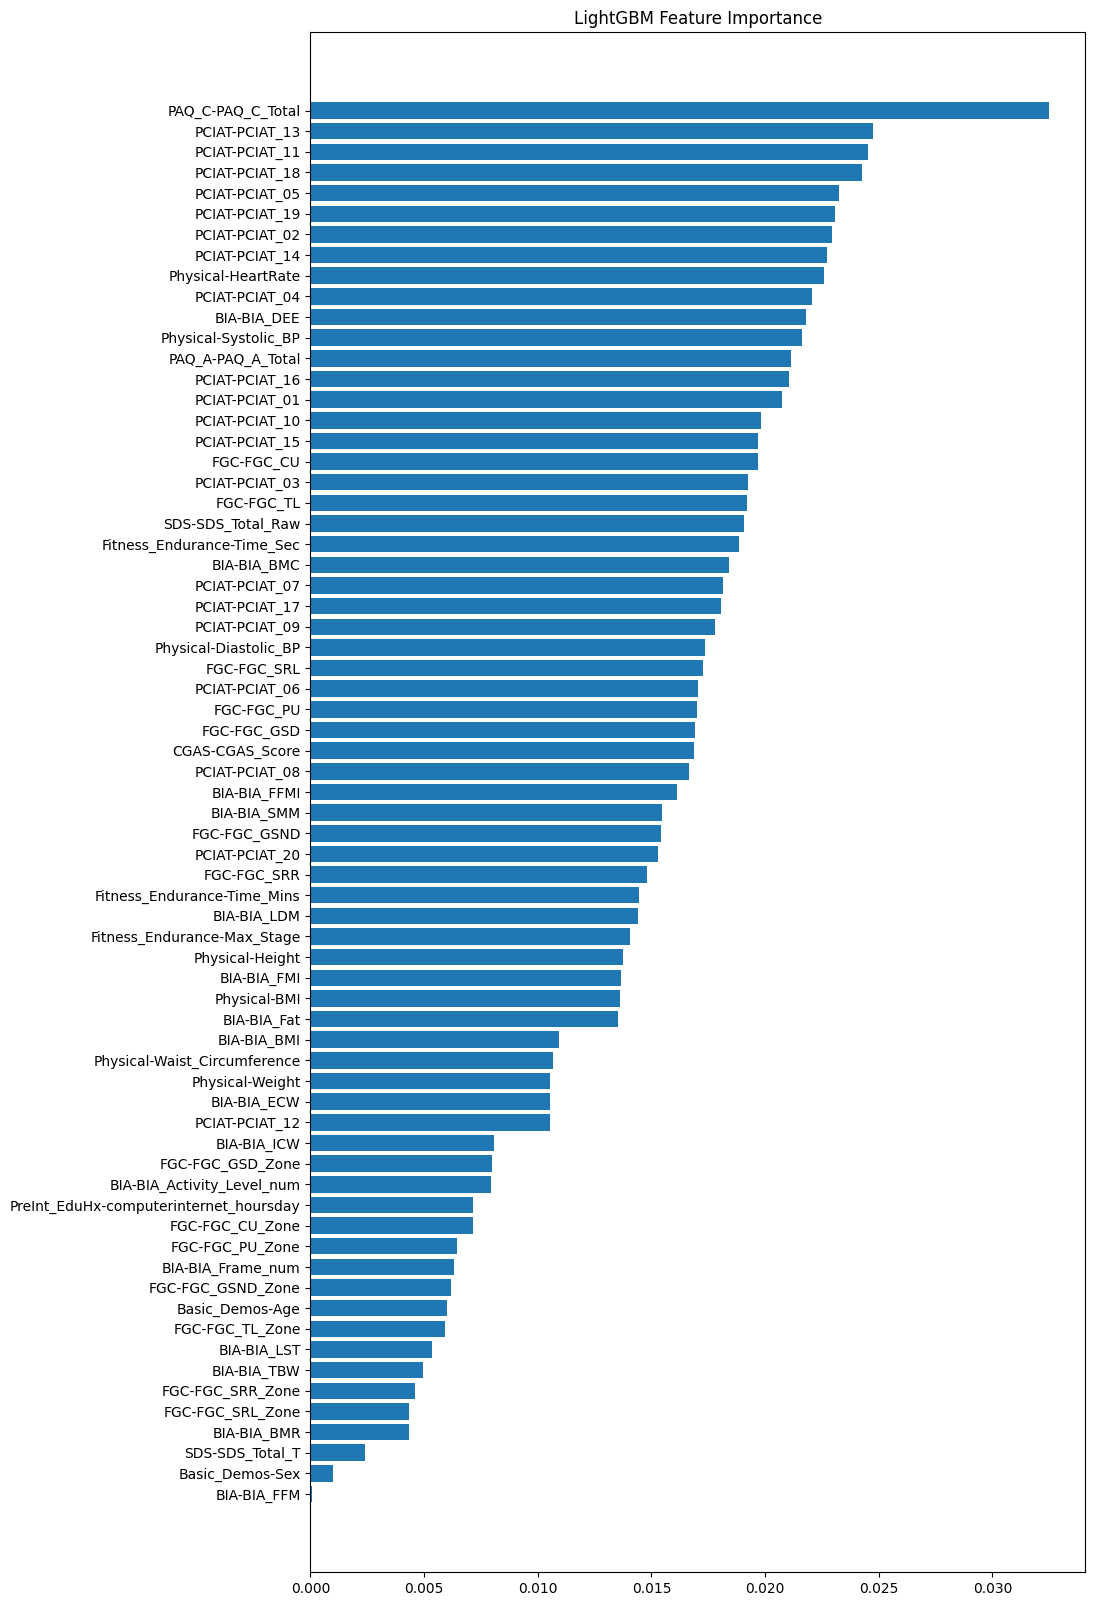

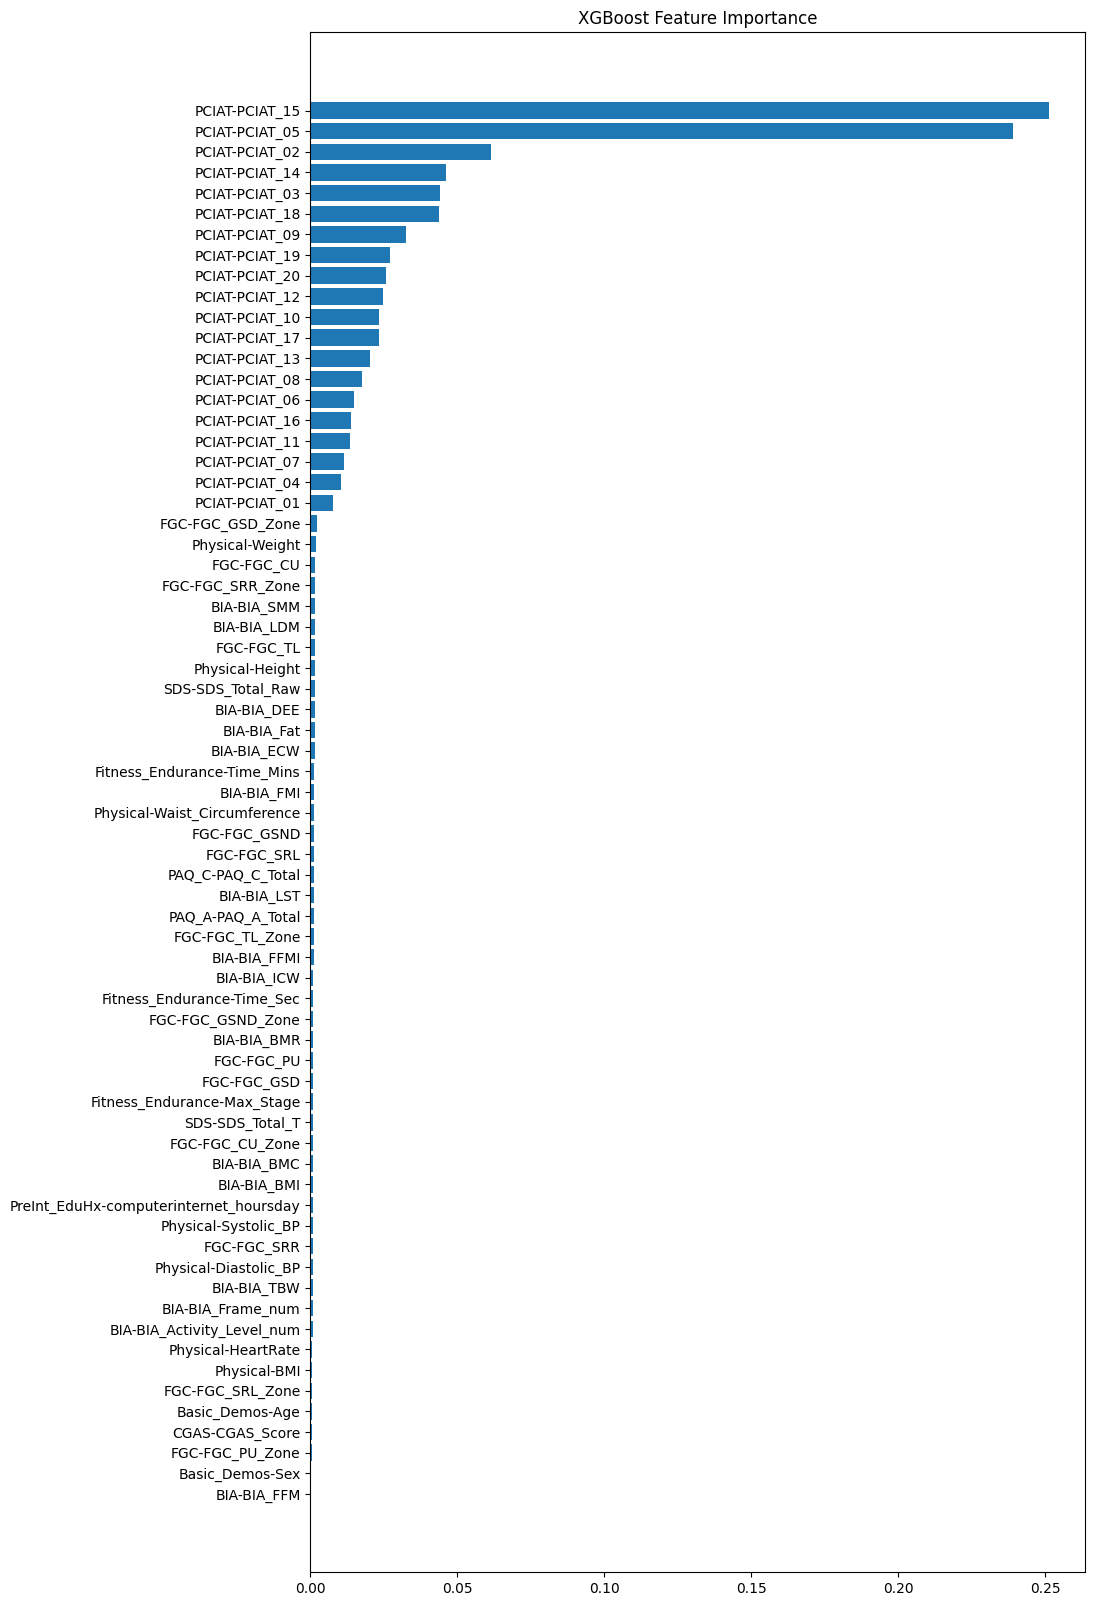

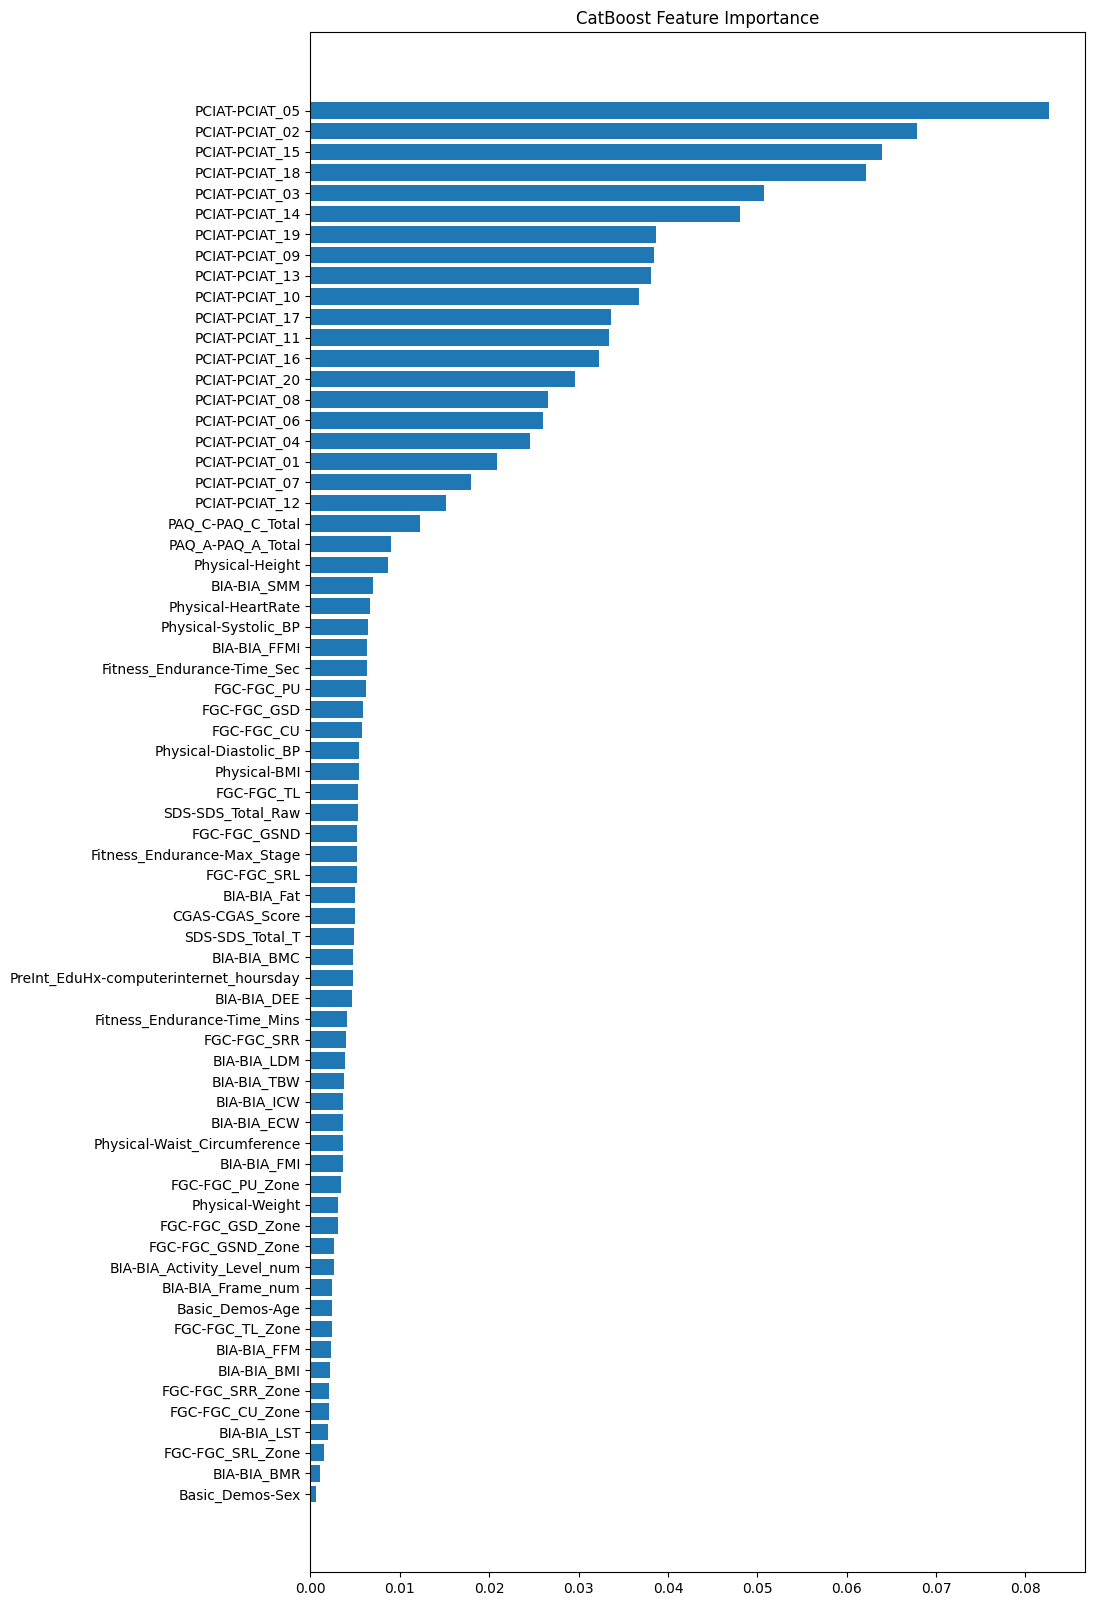

,id,sii
0,00008ff9,1
1,000fd460,0
2,00105258,0
3,00115b9f,1
4,0016bb22,1
5,001f3379,1
6,0038ba98,0
7,0068a485,0
8,0069fbed,1
9,0083e397,1


In [44]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
from sklearn.ensemble import VotingRegressor
import lightgbm as lgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from pytorch_tabnet.tab_model import TabNetRegressor

# Load your dataset


# Initialize individual models
lightgbm_model = lgb.LGBMRegressor()
xgboost_model = XGBRegressor()
catboost_model = CatBoostRegressor(silent=True)

# Wrap TabNet with the custom wrapper
tabnet_model = TabNetRegressorWrapper()

# Define the Voting Regressor
voting_model = VotingRegressor(estimators=[
    ('lightgbm', lightgbm_model),
    ('xgboost', xgboost_model),
    ('catboost', catboost_model),
    ('tabnet', tabnet_model)
])

Submission3 = TrainML(voting_model, test_data_with_predictions)

Submission3

In [45]:
Submission1.to_csv('submission.csv', index=False)